In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.ensemble import BalancedRandomForestClassifier


In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
if "customerID" in df.columns:
    df.drop("customerID", axis=1, inplace=True)

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
print(df.head())
print(df.dtypes)

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

/tmp/ipython-input-1604775180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
le = LabelEncoder()

# Find all object (string) columns
cat_cols = df.select_dtypes(include=["object"]).columns
print("Categorical columns:", cat_cols.tolist())

# Apply label encoding to each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\nAfter encoding:")
print(df.dtypes)
print(df.head())


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

After encoding:
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0 

In [ ]:
X = df.drop("Churn", axis=1)  # all input features
y = df["Churn"]               # target label (0/1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5634, 19)
Test shape: (1409, 19)


In [ ]:
model_brf = BalancedRandomForestClassifier(
    n_estimators=300,   # number of trees
    random_state=42
)

model_brf.fit(X_train, y_train)

print("✅ Balanced Random Forest model trained!")


✅ Balanced Random Forest model trained!


In [ ]:
# evaluation accuracy
y_pred = model_brf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7636621717530163


Confusion Matrix:
 [[807 228]
 [105 269]]


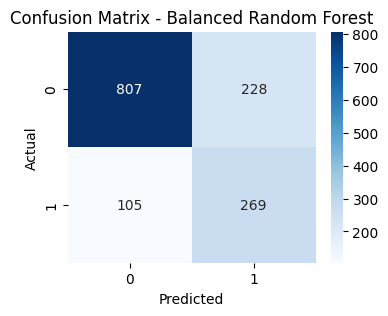

In [ ]:
#confudion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Balanced Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



In [ ]:
# Pick one customer from the test set
sample = X_test.iloc[0]
actual_label = y_test.iloc[0]

# Predict churn (0 or 1)
predicted_label = model_brf.predict([sample])[0]

# Predict probability of churn
churn_prob = model_brf.predict_proba([sample])[0][1]

print("=== SAMPLE CUSTOMER CHECK ===")
print("Actual Churn Label   :", actual_label)
print("Predicted Churn Label:", predicted_label)
print("Churn Probability    :", round(churn_prob, 3))


=== SAMPLE CUSTOMER CHECK ===
Actual Churn Label   : 0
Predicted Churn Label: 0
Churn Probability    : 0.01


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(
